In [1]:
#try:
  # This command only in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import PIL

2024-11-08 15:20:13.194097: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip



--2024-11-01 16:27:47--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 2606:4700:20::681a:321, 2606:4700:20::681a:221, 2606:4700:20::ac43:4695, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|2606:4700:20::681a:321|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67,43M  28,1MB/s    in 2,4s    

2024-11-01 16:27:50 (28,1 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
# 3
#Now it is your turn! Set each of the variables in this cell correctly. (They should no longer equal None.)
#Create image generators for each of the three image data sets (train, validation, test). 
#Use ImageDataGenerator to read / decode the images and convert them into floating point tensors. 
# Use the rescale argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.
#For the *_data_gen variables, use the flow_from_directory method. Pass in the batch size, directory, 
# target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required. 
# test_data_gen will be the trickiest one. For test_data_gen, 
# make sure to pass in shuffle=False to the flow_from_directory method. 
# This will make sure the final predictions stay in the order that our test expects. 
# For test_data_gen it will also be helpful to observe the directory structure.

train_image_generator = ImageDataGenerator(rescale=1. /255) #See https://stackoverflow.com/questions/50065555/how-does-keras-imagedatagenerator-rescale-parameter-works
validation_image_generator = ImageDataGenerator(rescale=1. /255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")

val_data_gen = train_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")


test_data_gen = test_image_generator.flow_from_directory(
    PATH,   #this is really a tricky one.....see https://stackoverflow.com/questions/59633759/how-to-call-the-keras-flow-from-directory-method-on-test-dataset "Another solution can be to set as a directory for the flow from directory function the parent folder of the test directory, and to set the classes attribute to the name of the test folder containing the images (here in the example 'test')""
    classes=["test"],
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


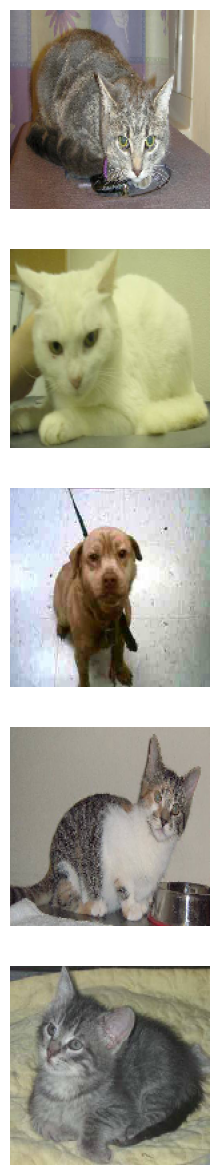

In [4]:
# 4
#The plotImages function will be used a few times to plot images. 
# It takes an array of images and a probabilities list, although the probabilities list is optional. 
# This code is given to you. If you created the train_data_gen variable correctly, 
# then running this cell will plot five random training images.

def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

# In order to get this work I needed to install pillow, as described e.g. here: https://stackoverflow.com/questions/48225729/importerrorcould-not-import-pil-image-working-with-keras-ternsorflow


In [5]:
# 5
#Recreate the train_image_generator using ImageDataGenerator.
#Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.
#Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

train_image_generator = ImageDataGenerator(rescale=1. /255, horizontal_flip=False, #I picked some randomly from here: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
    vertical_flip=False, rotation_range=10,
    width_shift_range=0.3,
    height_shift_range=0.3,
    channel_shift_range=0.1,
    zoom_range=0.1)   

Found 2000 images belonging to 2 classes.


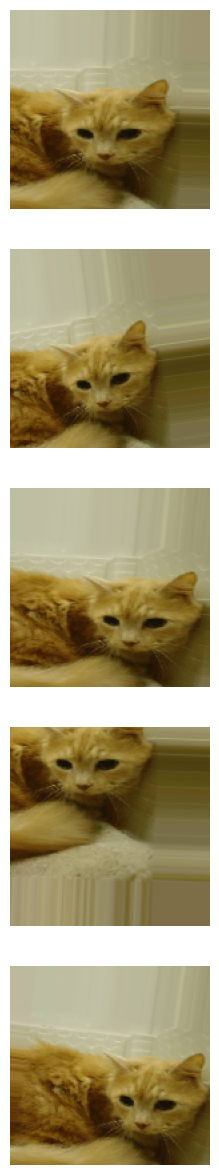

In [13]:
# 6
#You don't have to do anything for this cell. 
# train_data_gen is created just like before but with the new train_image_generator. 
# Then, a single image is plotted five different times using different variations.

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary',
                                                     shuffle=True)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [10]:
# 7
#In this cell, create a model for the neural network that outputs class probabilities. 
#It should use the Keras Sequential model. 
#It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.
#Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

#Attributions: https://victorzhou.com/blog/keras-cnn-tutorial/ and https://www.tensorflow.org/tutorials/images/cnn
#  

pool_size = (2, 2)
kernel_size = (3,3) #kernel_size: int or tuple/list of 2 integer, specifying the size of the convolution window.

model=Sequential()

# Convolutions
model.add( tf.keras.Input(shape=(150, 150, 3)))     #Because image size is 150 x 150 px. The first layer in any Sequential model must specify the input_shape

model.add(Conv2D(filters=32, kernel_size=kernel_size))    #I use 32 filters with each size 3x3
model.add(MaxPooling2D(pool_size=pool_size))           #This effectively aggregates the previous layer by 2

model.add(Conv2D(filters=64, kernel_size=kernel_size))                        #As we go deeper into the layers more complex aggregates of combined features could occure, hence I am doubling the number of filters. The total size does not increase as I have pooled before
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Conv2D(filters=128, kernel_size=kernel_size))                       #Same goes for this layer
model.add(MaxPooling2D(pool_size=pool_size))

# Dense layers
model.add(Flatten())                                #Before feeding to the output layer I need to flatten it out for the actual classification task
model.add(Dense(128, activation="relu", name="hidden_layer"))            #as I have 128 filters, meaning 128 outputs I need to go with 128 neurons here
model.add(Dense(1, activation="sigmoid", name="output_layer"))           #the actual classification task is to tell if an image shows either a dog or a cat, which can be expressed by a binary state

# Optimizer
model.compile(optimizer="adam",                     #this is one of the most common optimizers. See https://keras.io/api/optimizers/adam/
              loss="binary_crossentropy",           #this is the probably most used loss function: https://keras.io/api/losses/
              metrics=["accuracy"])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
# Use the fit method on your model to train the network. 
# Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.
history = model.fit(x=train_data_gen, epochs=epochs, steps_per_epoch = None, validation_data=val_data_gen, batch_size=batch_size) #see https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.5718 - loss: 0.6661 - val_accuracy: 0.6190 - val_loss: 0.6931
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.5671 - loss: 0.6691 - val_accuracy: 0.6250 - val_loss: 0.6565
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.5785 - loss: 0.6579 - val_accuracy: 0.6180 - val_loss: 0.6592
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.5859 - loss: 0.6685 - val_accuracy: 0.5840 - val_loss: 0.6672
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.5654 - loss: 0.6774 - val_accuracy: 0.6290 - val_loss: 0.6467
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.5714 - loss: 0.6586 - val_accuracy: 0.6280 - val_loss: 0.6590
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.5855 - loss: 0.6592 - val_accuracy: 0.5960 - val_loss: 0.6533
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.5839 - loss: 0.6638 - val_accuracy: 0.6230 - val_loss:

In [ ]:
# 9
# Run this cell to visualize the accuracy and loss of the model.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 10

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")